# Tobig's 18기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0]) # 변수 개수

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.06248149, 0.53207392, 0.48377053])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = {1\over1+exp^{-X_i\theta}}$

In [11]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1/(1+np.exp(-z))
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.6714075332367908

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
<br>
## $l(p) ={-\Sigma({y_i\log{p}(X_i)+(1-y_i)log{(1-p(X_i)))}}}$

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y * np.log(p) + (1 - y) * np.log(1-p))
    return loss

In [14]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters.T)
    loss = ((y - y_hat)**2) / 2
    return loss

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n  #loss 평균값으로 계산
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.9277993509675347

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)={-\Sigma(y_i - \theta^{T}X_i)X_{ij}}$
## ${\partial\over{\partial \theta_j}}l(p)={-\Sigma(y_i-p_i)x_{ij}}$ 

In [17]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X, parameters.T)
        gradient = -(y-y_hat) * X[j]
    else: #logistic
        p = logistic(X, parameters)
        gradient = -(y-p) * X[j]
    return gradient

In [18]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.1120670975440611

In [37]:
from IPython.display import Image

Image("C:/Users/김건우/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [20]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [21]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[34.55417169736586, 11.115511101173954, 42.32000282356648]

## mini-batch
인덱스로 미니 배치 나누기

In [22]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 
크기가 N인 전체 데이터셋을 몇 개의 데이터셋으로 나누었을 때 그 부분적인 하나의 데이터셋이 바로 미니 배치다. batch size는 한 번 기울기를 계산해 계수를 업데이트할 때 사용하는 데이터셋의 크기이며 하나의 미니 배치에 넘겨주는 데이터 갯수다. 즉, 미니 배치는 한 번 기울기를 업데이트할 때 사용되는 데이터셋이다.
batch_idx 함수는 batch_size 간격으로 인덱스를 리턴한다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [23]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients
    return parameters

In [24]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.06017788, 0.53133289, 0.4809492 ])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 모든 데이터를 한 번 학습했을 때를 1 epoch이라고 한다
- num_epoch:총 epoch 수
<br>


BGD: 학습 한 번에 모든 데이터셋을 사용해 기울기 업데이트

SGD: 학습 한 번에 임의의 1개의 데이터만 사용해 기울기 업데이트  

MGD: 학습 한 번에 데이터셋의 일부만 사용해 기울기 업데이트

<br>
batch_size에 따른 경사하강법의 종류를 적어주세요

batch_size=1 -> SGD

batch_size=k -> MGD  

batch_size=whole -> BGD  

In [25]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [26]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.7941841631869376  params: [0.14113318 0.57251767 0.41074295]  gradients: [0.025186080328899133, 0.007609198085846064, 0.02788993889962539]
epoch: 100  loss: 0.44749604294403383  params: [-0.85736955  0.91394707 -0.82321227]  gradients: [0.003190016091739841, -0.005952872098326309, 0.00646810730637154]
epoch: 200  loss: 0.3895701259854734  params: [-1.04556166  1.42889639 -1.3439364 ]  gradients: [0.0012234484533660047, -0.004388448493683991, 0.004304823699760047]
epoch: 300  loss: 0.3601994238990136  params: [-1.14634967  1.80908219 -1.71460697]  gradients: [0.000865175839425929, -0.0033106024298112323, 0.0032123692723855794]
epoch: 400  loss: 0.34282778208989917  params: [-1.224326    2.10286447 -1.99873538]  gradients: [0.0007086450850546769, -0.002618840196763452, 0.0025246303863274227]
epoch: 500  loss: 0.33160967232751143  params: [-1.28946553  2.33940555 -2.22615896]  gradients: [0.000600242504150853, -0.002143904063616421, 0.002055849072566551]
epoch: 600  loss

array([-1.50426373,  3.0777559 , -2.92828588])

In [27]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.2805396759712721  params: [-0.87261719  1.02703773 -1.15662534]  gradients: [0.025309777331872646, 0.013773605031999423, 0.01780772500746133]
epoch: 100  loss: 0.07736674299312003  params: [-1.93032538  4.17501862 -4.06769033]  gradients: [0.007538546096649468, 0.004102483996175411, 0.005304051240156529]
epoch: 200  loss: 0.07736266552398659  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159522036747, 0.004102273621901422, 0.005303779249838008]
epoch: 300  loss: 0.07736266518361752  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767162, 0.004102273604340283, 0.0053037792271334264]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 0

array([-1.9303681 ,  4.17514311, -4.06780375])

In [28]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 1.3562403102254352  params: [0.59292995 0.16945099 0.54683303]  gradients: [0.061865310999375304, 0.055210078869084016, 0.07108780364125392]
epoch: 100  loss: 0.199778903503805  params: [-1.55266547  3.04253136 -2.99146916]  gradients: [0.007433506833401844, 0.010931951474746958, 0.014591302987524047]


array([-1.69674331,  3.53693531, -3.43567235])

### Predict Label

In [29]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [30]:
from sklearn.metrics import *

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [32]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [33]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [34]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [35]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.39906356, 2.83234277])

In [38]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.41055092684027733  params: [0.85825065 1.41497999]  gradients: [-0.04648923080168096, -0.04298813029650003]
epoch: 100  loss: 0.1737349089393451  params: [0.42366748 2.8762947 ]  gradients: [-0.015869387380867822, -0.01017683223686857]
epoch: 200  loss: 0.17369612480110172  params: [0.42260426 2.8783431 ]  gradients: [-0.0158782301808811, -0.010155746908397979]
epoch: 300  loss: 0.17369606545785074  params: [0.42260262 2.87834626]  gradients: [-0.015878243802759734, -0.010155714427533893]
epoch: 400  loss: 0.17369606536643634  params: [0.42260262 2.87834626]  gradients: [-0.01587824382374354, -0.010155714377498784]
epoch: 500  loss: 0.17369606536629567  params: [0.42260262 2.87834626]  gradients: [-0.015878243823775867, -0.010155714377421741]
epoch: 600  loss: 0.17369606536629545  params: [0.42260262 2.87834626]  gradients: [-0.01587824382377591, -0.010155714377421654]
epoch: 700  loss: 0.17369606536629545  params: [0.42260262 2.87834626]  gradients: [-0.0158782438237

array([0.42260262, 2.87834626])

In [39]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

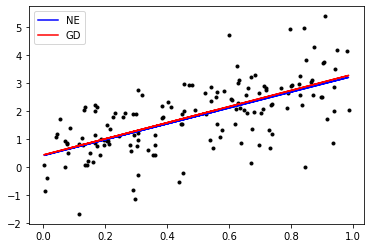

In [40]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()